In [1]:
using Pkg
Pkg.activate("../.")
using Revise
using Network

  Activating project at `~/Documents/Programmierung/Julia/08_Projects/NetworkOptimization`


# Network 

This package is build on `Graph.jl` and `SimpleWeightedGraphs`. It just tailors these packages for my personal use. 

Some algorithms are implemented by myself. There are not more efficient or better. Just to know how to implement them.

Define a random undirected and unweighted network with $n$ nodes and an edge density of $\rho$:

In [2]:
n = 20
ρ=0.1
net = Network.rand_network(n,ρ; weights=1:10) # weights are in range 1:m (m=1)

{20, 33} undirected simple Int64 graph with Float64 weights

Plot the network (using `GraphPlot` with some predefined parameters). So it is just a shortcut, but works for a lot of graphs. Of course you can use `gplot` directly.

directed = !(is_symmetric(netw1)) = false


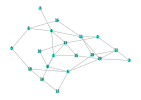

In [3]:
Network.plot_network(net; label=false)

Define a directed network with $n$ nodes and an edge density of $\rho$. The network ist weighted with randomly edge_weights between the range $R$:

directed = !(is_symmetric(netw1)) = true


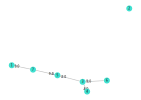

In [4]:
n = 7
ρ = 0.2
R  = 1:10
net = Network.rand_directed_network(n,ρ;weights=R)
plot_network(net)

In [5]:
Network.toplogicalsort!(net)
typeof(net)

SimpleWeightedGraphs.SimpleWeightedDiGraph{Int64, Float64}

The network $net$ is of type `SimpleWeightedGraph`. So you can the complete functionality of `Graph.jl` and `SimpleWeightedGraphs.jl`.

In [6]:
typeof(net)

SimpleWeightedGraphs.SimpleWeightedDiGraph{Int64, Float64}

In [7]:
net.weights

7×7 SparseArrays.SparseMatrixCSC{Float64, Int64} with 5 stored entries:
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   9.0  9.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   2.0   ⋅    ⋅    ⋅    ⋅ 
 4.0   ⋅    ⋅    ⋅   9.0   ⋅    ⋅ 

In [8]:
using Graphs, SimpleWeightedGraphs, SparseArrays

In [9]:
@show nv(net) # number of vertices
@show ne(net); # number of edges
@show has_self_loops(net)
@show Network.is_directed(net)
@show eltype(net);
@show Graphs.neighbors(net,7);
@show Network.parents(net,7);
@show Network.children(net,7);
@show Network.neighbors(net,7); # neighbors are children and parents together!

nv(net) = 7
ne(net) = 5
has_self_loops(net) = false
Network.is_directed(net) = true
eltype(net) = Int64
Graphs.neighbors(net, 7) = Int64[]
Network.parents(net, 7) = Int64[]
Network.children(net, 7) = [1, 5]
Network.neighbors(net, 7) = [1, 5]


Or you define a graph $g$ from generators of `Graph.jl`:

In [10]:
g1 = path_digraph(100);
g2 = Graphs.SimpleGraphs.grid([5,5]);

In [11]:
p1 = Network.plot_graph(g1);
p2 = Network.plot_graph(g2);


directed = !(is_symmetric(netw1)) = true
directed = !(is_symmetric(netw1)) = false


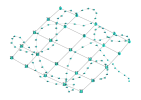

In [12]:
using Compose
compose(p1,p2)

In [13]:
using Random
using SparseArrays
#DAG
N=10
p=0.2
# get matrix (empty)
dag = zeros(N,N)
sink = shuffle!(collect(2:N-1))

# make connected:
dag[1,sink[1]]=1
dag[sink[length(sink)],N] = 1
for i=1:length(sink)-1
    dag[sink[i],sink[i+1]] = 1;
end

# add links to sinks between each other and end-sink
sink = append!([1],sink,[10])  # why !???
L = length(sink)
for k = 1:L
    nArcs = trunc(Int,round(p * (L-k)))
    idx = shuffle!(findall(x->x>k,(1:L)))
    for l = 1:nArcs
        dag[sink[k],sink[idx[l]]] = 1
    end  
end

dag[1,N]=0

adj=dag;

order, acyclic = Network.toplogicalsort(SparseMatrixCSC(adj))

sorted_adj = zeros(N,N)
@show sum(order) == sum(collect(1:N))
for i=1:N
    sorted_adj[i,:] = dag[order[i],:]
end

sorted_adj = SparseMatrixCSC(dag)


sum(order) == sum(collect(1:N)) = true


10×10 SparseMatrixCSC{Float64, Int64} with 16 stored entries:
  ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0
  ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0
  ⋅    ⋅   1.0  1.0   ⋅    ⋅    ⋅    ⋅   1.0   ⋅ 
  ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0   ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 

In [14]:
acyclic

true

directed = !(is_symmetric(netw1)) = true


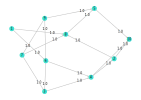

In [15]:
Network.plot_network(sorted_adj)

In [16]:
g = SimpleWeightedDiGraph(sorted_adj)

{10, 16} directed simple Int64 graph with Float64 weights

## Parse Graphviz dot format